# Waiter Tip Predictions

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Libraries imported sucessfully')

Libraries imported sucessfully


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the dataset
tips = sns.load_dataset('tips')
print('Dataset loaded sucessfully')

Dataset loaded sucessfully


In [4]:
# First 5 rows
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# Checking the shape
tips.shape

(244, 7)

In [6]:
# Checking summary
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [7]:
# checking description
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
# Check duplicate rows
tips.duplicated().sum()

1

In [9]:
tips.drop_duplicates(inplace=True)

In [10]:
tips.shape

(243, 7)

Duplicate row is removed from dataset

In [11]:
# check missing value
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

No missing values are present we can proceed further.

In [12]:
# last 5 rows
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## EDA

In [13]:
# Find the number of male and female
tips.sex.value_counts()

Male      157
Female     86
Name: sex, dtype: int64

In [14]:
# Find the number of person do smoke
tips.smoker.value_counts()

No     151
Yes     92
Name: smoker, dtype: int64

In [15]:
# how many female smokes
tips[['sex','smoker']].value_counts()

sex     smoker
Male    No        97
        Yes       60
Female  No        54
        Yes       32
dtype: int64

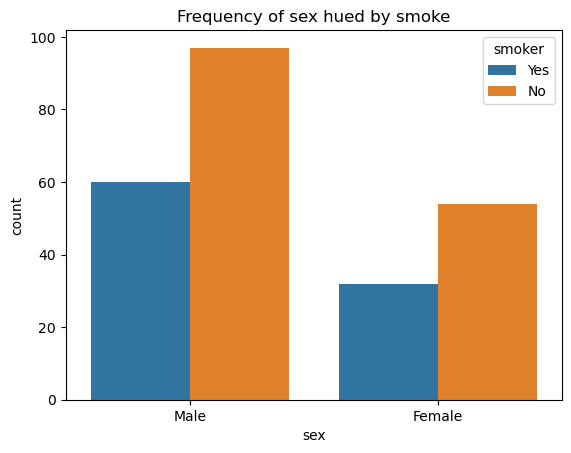

In [16]:
sns.countplot(data=tips,x='sex',hue='smoker')
plt.title('Frequency of sex hued by smoke')
plt.show()

In [17]:
# Finding the unique days
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

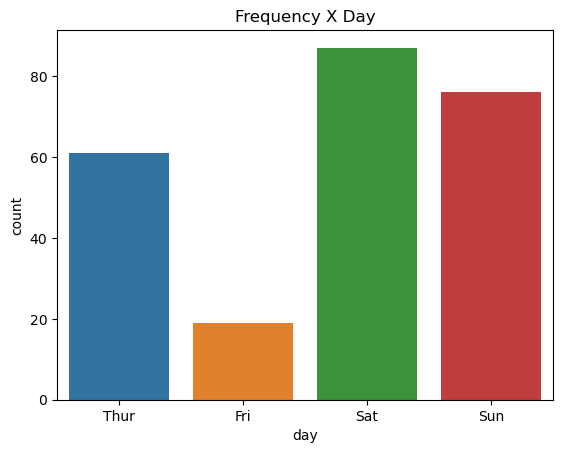

In [18]:
sns.countplot(data=tips,x='day')
plt.title('Frequency X Day')
plt.show()

Most of the people visit restaurent on sat and sun. 

Friday has very less frequncy

In [19]:
# Find the unique time
tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

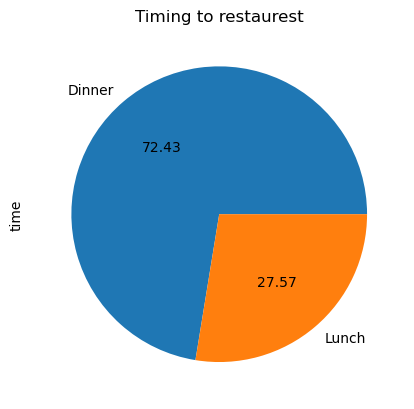

In [20]:
tips.time.value_counts().plot(kind='pie',autopct='%1.2f')
plt.title('Timing to restaurest')
plt.show()

72.43% people visit for restaurent in dinner time.

Text(0.5, 1.0, 'Frequency X size')

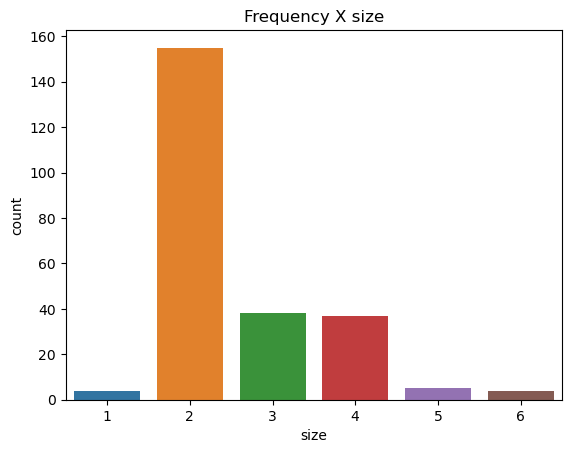

In [21]:
# how many people visit in group
sns.countplot(data=tips,x='size')
plt.title('Frequency X size')

2 peoples group visited most of the times.

Text(0.5, 1.0, 'Total-bill vs tip')

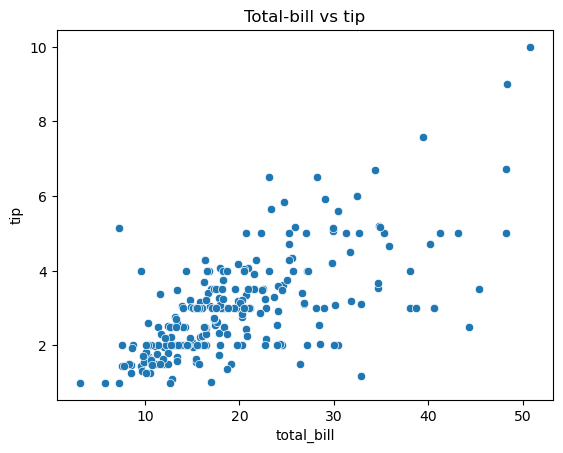

In [22]:
sns.scatterplot(data=tips,x='total_bill',y='tip')
plt.title('Total-bill vs tip')

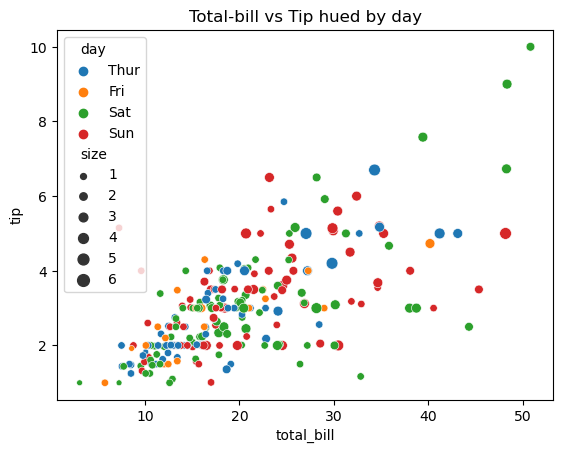

In [23]:
sns.scatterplot(data=tips,x='total_bill',y='tip',hue='day',size='size')
plt.title('Total-bill vs Tip hued by day')
plt.show()

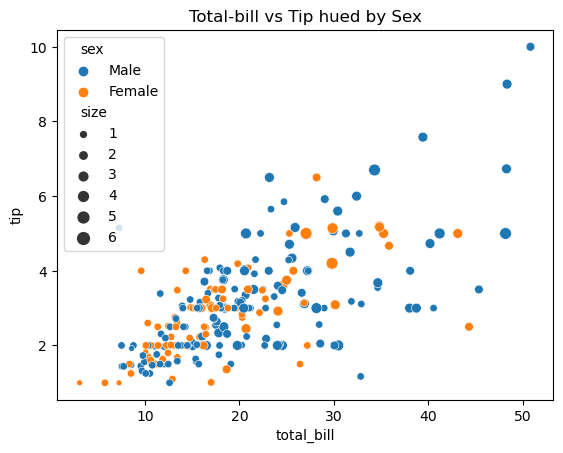

In [24]:
sns.scatterplot(data=tips,x='total_bill',y='tip',hue='sex',size='size')
plt.title('Total-bill vs Tip hued by Sex')
plt.show()

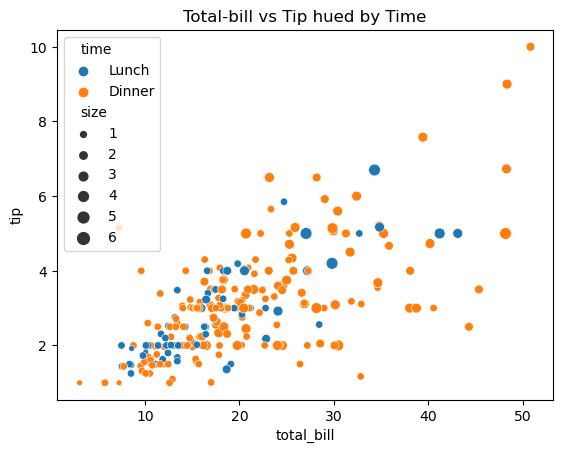

In [25]:
sns.scatterplot(data=tips,x='total_bill',y='tip',hue='time',size='size')
plt.title('Total-bill vs Tip hued by Time')
plt.show()

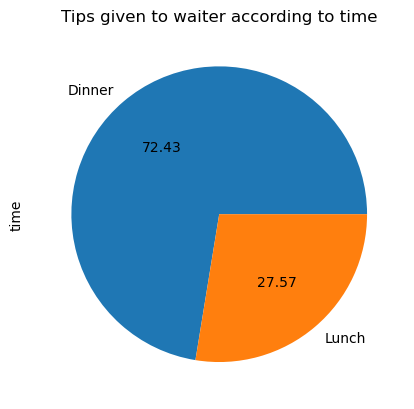

In [26]:
# Now will see tips given to waiter according to the time
tips.time.value_counts().plot(kind='pie',autopct='%1.2f')
plt.title('Tips given to waiter according to time')
plt.show()

According to the visuliztion most tip given to the waiter in the dinner time.

In [27]:
tips[:3]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [28]:
# Now import label encoder to change categarical feature to numerical feature
from sklearn.preprocessing import LabelEncoder

In [29]:
lb = LabelEncoder()

In [30]:
lb.fit_transform(tips.sex)

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0])

In [31]:
lb.classes_

array(['Female', 'Male'], dtype=object)

In [32]:
tips.sex = lb.fit_transform(tips.sex)

In [33]:
tips[:3]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3


In [34]:
tips.smoker = lb.fit_transform(tips.smoker)
tips.day = lb.fit_transform(tips.day)
tips.time = lb.fit_transform(tips.time)

In [35]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [36]:
# input parameter
X = tips.loc[:,['total_bill','sex','smoker','day','time','size']]
X[:3]

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3


In [37]:
y = tips.tip
y[:3]

0    1.01
1    1.66
2    3.50
Name: tip, dtype: float64

In [38]:
# Now dataset is split in sets that is training set and testing set
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
# Training data
len(X_train)

194

In [41]:
len(y_train)

194

In [42]:
# Testing data
len(X_test)

49

In [43]:
len(y_test)

49

### Traing of data

In [44]:
# Import the linear regression model
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train,y_train)

LinearRegression()

### Testing phase

In [60]:
y_pred = model.predict(X_test)

In [61]:
y_pred

array([2.89897995, 1.98301617, 2.92154456, 2.13011723, 3.89867753,
       3.98146582, 4.20683088, 2.43328936, 2.49360898, 3.27266656,
       2.79180877, 3.93461572, 2.34335982, 5.69747776, 1.87353032,
       2.3134997 , 3.95270547, 3.07131798, 2.58711167, 2.46883161,
       3.38181365, 3.18673614, 2.76474756, 2.02646944, 3.64743121,
       2.64841193, 2.11045198, 3.28571607, 2.50168615, 4.40007673,
       1.58826366, 1.82112916, 3.16269939, 2.8873421 , 2.87134448,
       1.98465086, 3.45837962, 2.08770524, 2.43739744, 3.08954025,
       2.10802835, 2.14004722, 4.68950403, 2.30722863, 1.90309194,
       1.1815748 , 4.36641791, 3.02022002, 4.56462436])

In [62]:
# Slope of the model
print('Slope of model :',model.coef_)

Slope of model : [ 8.49572066e-02  2.55624889e-02 -5.15677367e-02  2.28133513e-02
  6.06403610e-05  2.17241713e-01]


In [63]:
# Coefficient of model
print('Co-efficient of model :',model.intercept_)

Co-efficient of model : 0.7322688477180761


In [64]:
# Now check performance
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [68]:
# MAE 
mean_absolute_error(y_test,y_pred)

0.7685823335429991

In [67]:
mean_squared_error(y_test,y_pred)

1.1698916854384567

In [69]:
# RMSE
from math import sqrt
sqrt(mean_squared_error(y_test,y_pred))

1.0816153130565676

In [70]:
r2_score(y_test,y_pred)

0.5198425346286455